# 1 AdaBoost on a toy dataset

## 1.1

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
X = np.array([[0,-1],[1,0],[-1,0],[0,1]])
Y = np.array([-1,1,1,-1])

In [3]:
def adaboost(X, y, num_iter):
    """Given an numpy matrix X, a array y and num_iter return trees and weights 
   
    Input: X, y, num_iter
    Outputs: array of trees from DecisionTreeClassifier
             trees_weights array of floats
    Assumes y is {-1, 1}
    """
    trees = []
    trees_weights = [] 
    N, _ = X.shape
    d = np.ones(N) / N
    dic = []

    # YOUR CODE HERE
    for m in range(num_iter):
        clf = DecisionTreeClassifier(max_depth=1, random_state=0)
        clf.fit(X, y, sample_weight=d)
        pred = clf.predict(X)
        test = pred == y
        error = 0
        for i in range(len(test)):
            if not test[i]:
                error += d[i]
        error = error / d.sum()
        tree_weight = np.log((1-error)/error)
        for i in range(len(test)):
            if not test[i]:
                d[i] = d[i] * np.exp(tree_weight)
        trees.append(clf)
        trees_weights.append(tree_weight)
        dic.append({'$w1$':d[0],'$w2$':d[1],'$w3$':d[2],'$w4$':d[3],
                   'err':error, '$\\alpha$':tree_weight,
                   '$G_m(x_1)$':pred[0],'$G_m(x_2)$':pred[1],
                   '$G_m(x_3)$':pred[2],'$G_m(x_4)$':pred[3]})
    return trees, trees_weights, dic

In [4]:
trees, trees_weights, dic = adaboost(X,Y,4)

In [5]:
pd.DataFrame(dic, columns = ['$w1$', '$w2$', '$w3$', '$w4$','err', '$\\alpha$', 
                             '$G_m(x_1)$', '$G_m(x_2)$', '$G_m(x_3)$', '$G_m(x_4)$'])

,$w1$,$w2$,$w3$,$w4$,err,$\alpha$,$G_m(x_1)$,$G_m(x_2)$,$G_m(x_3)$,$G_m(x_4)$
0,0.25,0.25,0.25,0.75,0.250000,1.098612,-1,1,1,1
1,1.25,0.25,0.25,0.75,0.166667,1.609438,1,1,1,-1
2,1.25,2.25,0.25,0.75,0.100000,2.197225,-1,-1,1,-1
3,1.25,2.25,4.25,0.75,0.055556,2.833213,-1,1,-1,-1


## 1.2

In [6]:
# accuracy computation
def accuracy(y, pred):
    return np.sum(y == pred) / float(len(y)) 

In [7]:
def adaboost_predict(X, trees, trees_weights):
    """Given X, trees and weights predict Y
    """
    # X input, y output
    N, _ =  X.shape
    y = np.zeros(N)
    # YOUR CODE HERE
    y_preds = []
    for tree in trees:
        y_preds.append(tree.predict(X))
    y_preds = np.array(y_preds)
    final_pred = np.array(trees_weights).dot(y_preds)
    for i in range(len(final_pred)):
        if final_pred[i] < 0:
            y[i] = -1
        else:
            y[i] = 1
    return y

In [8]:
Yhat = adaboost_predict(X, trees, trees_weights)
print(Yhat)
print('The training error of AdaBoost for this toy dataset is %f.' % (1 - accuracy(Y, Yhat)))

[-1.  1.  1. -1.]
The training error of AdaBoost for this toy dataset is 0.000000.


The training error of AdaBoost for this toy dataset is 0. According to the equation $G(x_i) = sign(\sum_{1}^M\alpha_m\times G_m(x_i))$, We get the final predition [-1, 1, 1, -1], which is exactly the same as the true label. Therefore, we will get zero training error no matter what metric we use.

## 1.3

The dataset is not linearly separable. With only one decision stump, we can not get a perfect classifier on the above dataset. With AdaBoost, we could combines the outputs of many “weak” classifiers to produce a descent result.

# 2 Implement AdaBoost 

## 2.1

# Adaboost
For this exercise you will implement AdaBoost from scratch and applied it to a spam dataset. You will be classifying data into spam and not spam. You can call DecisionTreeClassifier from sklearn to learn your base classifiers.

Here is how you train a decision tree classifier with weights.

`
h = DecisionTreeClassifier(max_depth=1, random_state=0)
h.fit(X, Y, sample_weight=w)
`

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [10]:
# accuracy computation
def accuracy(y, pred):
    return np.sum(y == pred) / float(len(y)) 

In [11]:
def parse_spambase_data(filename):
    """ Given a filename return X and Y numpy arrays

    X is of size number of rows x num_features
    Y is an array of size the number of rows
    Y is the last element of each row. (Convert 0 to -1)
    """
    #YOUR CODE HERE
    X = []
    Y = []
    with open(filename) as f:
        for line in f:
            row = [float(x) for x in line.split(',')]
            X.append(row[:-1])
            Y.append(row[-1])
    return np.array(X), (np.array(Y) - 1/2) * 2

In [12]:
y_test = np.array([1., -1., 1., 1., -1., -1., 1., 1., 1., -1.])
X, Y = parse_spambase_data("tiny.spam.train")
for i in range(len(y_test)): assert(y_test[i] == Y[i])
n, m = X.shape
assert(n == 10)
assert(m == 57)

In [13]:
def adaboost(X, y, num_iter):
    """Given an numpy matrix X, a array y and num_iter return trees and weights 
   
    Input: X, y, num_iter
    Outputs: array of trees from DecisionTreeClassifier
             trees_weights array of floats
    Assumes y is {-1, 1}
    """
    trees = []
    trees_weights = [] 
    N, _ = X.shape
    d = np.ones(N) / N

    # YOUR CODE HERE
    for m in range(num_iter):
        clf = DecisionTreeClassifier(max_depth=1, random_state=0)
        clf.fit(X, y, sample_weight=d)
        pred = clf.predict(X)
        test = pred == y
        error = 0
        for i in range(len(test)):
            if not test[i]:
                error += d[i]
        error = error / d.sum()
        tree_weight = np.log((1-error)/error)
        for i in range(len(test)):
            if not test[i]:
                d[i] = d[i] * np.exp(tree_weight)
        trees.append(clf)
        trees_weights.append(tree_weight)
    return trees, trees_weights

In [14]:
X, Y = parse_spambase_data("tiny.spam.train")
trees, weights = adaboost(X, Y, 2)
assert(len(trees) == 2)
assert(len(weights) == 2)
assert(isinstance(trees[0], DecisionTreeClassifier))

In [15]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
h = trees[0]
pred = h.predict(x)
for i in range(len(y)): assert(pred[i] == y[i])

/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [16]:
def adaboost_predict(X, trees, trees_weights):
    """Given X, trees and weights predict Y
    """
    # X input, y output
    N, _ =  X.shape
    y = np.zeros(N)
    # YOUR CODE HERE
    y_preds = []
    for tree in trees:
        y_preds.append(tree.predict(X))
    y_preds = np.array(y_preds)
    final_pred = np.array(trees_weights).dot(y_preds)
    for i in range(len(final_pred)):
        if final_pred[i] < 0:
            y[i] = -1
        else:
            y[i] = 1
    return y

In [17]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
pred = adaboost_predict(x, trees, weights)
for i in range(len(y)):
    assert(pred[i] == y[i])

/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [18]:
X, Y = parse_spambase_data("spambase.train")
X_test, Y_test = parse_spambase_data("spambase.test")
trees, trees_weights = adaboost(X, Y, 10)
Yhat = adaboost_predict(X, trees, trees_weights)
Yhat_test = adaboost_predict(X_test, trees, trees_weights)
    
acc_test = accuracy(Y_test, Yhat_test)
acc_train = accuracy(Y, Yhat)
print("Train Accuracy %.4f" % acc_train)
print("Test Accuracy %.4f" % acc_test)
assert(np.around(acc_train, decimals=4)==0.9111)
assert(np.around(acc_test, decimals=4)==0.9190)

Train Accuracy 0.9111
Test Accuracy 0.9190


## 2.2

#### split in train and val set

In [19]:
np.random.seed(26)
trn_sz = X.shape[0] - X_test.shape[0]
idxs = np.random.permutation(X.shape[0])
X_train, Y_train = X[idxs[:trn_sz]], Y[idxs[:trn_sz]]
X_val, Y_val = X[idxs[trn_sz:]], Y[idxs[trn_sz:]]

In [20]:
X.shape, X_test.shape, X_train.shape, X_val.shape

((3600, 57), (1000, 57), (2600, 57), (1000, 57))

In [21]:
Y.shape, Y_test.shape, Y_train.shape, Y_val.shape

((3600,), (1000,), (2600,), (1000,))

#### tune hyperparameter

In [22]:
%%time
numTrees = [2000, 2200, 2400, 2600, 2800, 3000]
dic = []
for n in numTrees:
    trees, trees_weights = adaboost(X_train, Y_train, n)
    Yhat_train = adaboost_predict(X_train, trees, trees_weights)
    Yhat_val = adaboost_predict(X_val, trees, trees_weights)
    dic.append({'numTrees':n, 'train accuracy':accuracy(Y_train, Yhat_train), 
                'validation accuracy':accuracy(Y_val, Yhat_val)})

CPU times: user 1min 36s, sys: 608 ms, total: 1min 37s
Wall time: 1min 31s


In [23]:
import pandas as pd
result = pd.DataFrame(dic, columns = ['numTrees', 'train accuracy', 'validation accuracy'])
result.sort_values('validation accuracy',  ascending=False)

,numTrees,train accuracy,validation accuracy
3,2600,0.968077,0.941
4,2800,0.968846,0.940
2,2400,0.967692,0.939
5,3000,0.972308,0.939
1,2200,0.967692,0.938
0,2000,0.966154,0.937


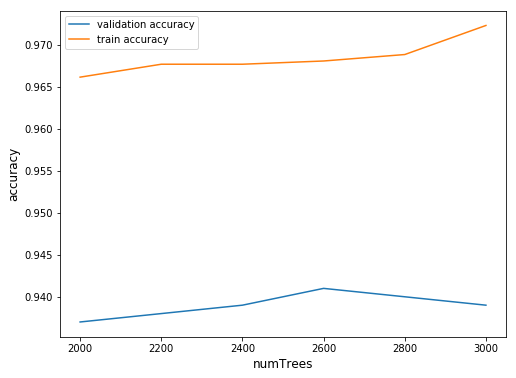

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(numTrees, result['validation accuracy'], label='validation accuracy')
plt.plot(numTrees, result['train accuracy'], label='train accuracy')
plt.xlabel('numTrees', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')
plt.show()

Therefore, the best value of `numTrees` is 2600 and the train and validation accuracy is 0.968 and 0.941, respectively. After that, the train accuracy goes up while the validation accuracy goes down, which means overfitting.

#### train the final model

In [25]:
trees, trees_weights = adaboost(X, Y, 2600)
Yhat = adaboost_predict(X, trees, trees_weights)
Yhat_test = adaboost_predict(X_test, trees, trees_weights)

acc_test = accuracy(Y_test, Yhat_test)
acc_train = accuracy(Y, Yhat)
print("Train Accuracy %.4f" % acc_train)
print("Test Accuracy %.4f" % acc_test)

Train Accuracy 0.9644
Test Accuracy 0.9570


## 2.3

In [26]:
import xgboost as xgb

/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
def change_binary(y_true):
    y = y_true.copy()
    for i in range(len(y)):
        if y[i] == -1:
            y[i] = 0
    return y

In [28]:
Y_train_xgb = change_binary(Y_train)
Y_val_xgb = change_binary(Y_val)

In [29]:
dtrain = xgb.DMatrix(X_train, label=Y_train_xgb)
dval = xgb.DMatrix(X_val, label=Y_val_xgb)

#### tune `num_round`

In [30]:
%%time
param = {'max_depth':1, 'objective':'multi:softmax', 'num_class':2}
num_round = [1000, 1200, 1400, 1600, 1800, 2000]
dic = []
for n in num_round:
    bst = xgb.train(param, dtrain, n)
    Yhat_train = bst.predict(dtrain)
    Yhat_val = bst.predict(dval)
    dic.append({'num_round':n,
            'train accuracy':accuracy(Y_train_xgb, Yhat_train), 
            'validation accuracy':accuracy(Y_val_xgb, Yhat_val)})

CPU times: user 35.3 s, sys: 13.5 s, total: 48.8 s
Wall time: 18.7 s


In [31]:
result = pd.DataFrame(dic, columns = ['num_round', 'train accuracy', 'validation accuracy'])
result.sort_values('validation accuracy',  ascending=False)

,num_round,train accuracy,validation accuracy
2,1400,0.981538,0.944
4,1800,0.982692,0.944
5,2000,0.983077,0.944
3,1600,0.981923,0.943
1,1200,0.980000,0.941
0,1000,0.980000,0.940


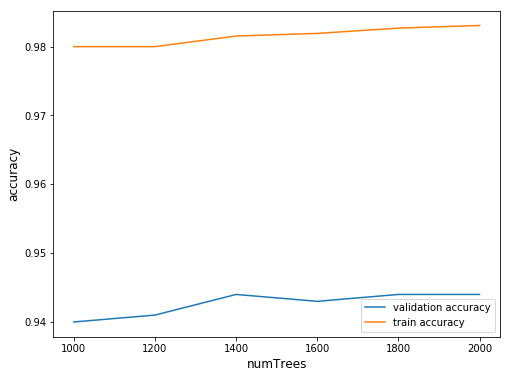

In [32]:
plt.figure(figsize=(8,6))
plt.plot(num_round, result['validation accuracy'], label='validation accuracy')
plt.plot(num_round, result['train accuracy'], label='train accuracy')
plt.xlabel('numTrees', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')
plt.show()

Therefore, the best value of `num_boost` is 1400 and the train and validation accuracy is 0.982 and 0.944, respectively. After that, the train accuracy goes up while the validation accuracy doesn't change much.  
Comparing to the AdaBoost, XGBoost needs less rounds to achieve higher accuracy on both train and validation set and it takes much less time.

#### tune `learning_rate`

In [33]:
%%time
dic = []
learning_rate = [0.00, 0.05, 0.10, 0.15, 0.20]

for i in learning_rate:
    param = {'max_depth':1, 'learning_rate':i, 'objective':'multi:softmax', 'num_class':2}
    bst = xgb.train(param, dtrain, 1400)
    Yhat_train = bst.predict(dtrain)
    Yhat_val = bst.predict(dval)
    dic.append({'learning_rate':i,
                'train accuracy':accuracy(Y_train_xgb, Yhat_train), 
                'validation accuracy':accuracy(Y_val_xgb, Yhat_val)})

CPU times: user 25.1 s, sys: 9.85 s, total: 34.9 s
Wall time: 10.8 s


In [34]:
result = pd.DataFrame(dic, columns = ['learning_rate', 'train accuracy', 'validation accuracy'])
result.sort_values('validation accuracy',  ascending=False)

,learning_rate,train accuracy,validation accuracy
1,0.05,0.962692,0.943
2,0.10,0.970769,0.942
3,0.15,0.976923,0.940
4,0.20,0.979615,0.940
0,0.00,0.606154,0.581


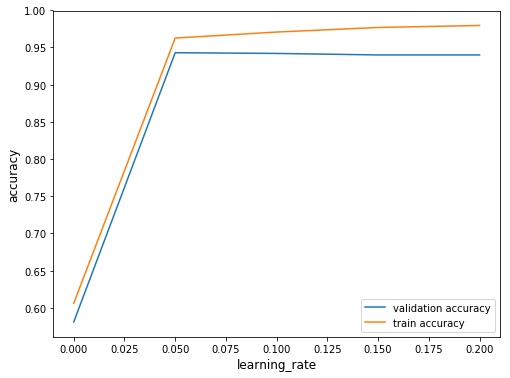

In [35]:
plt.figure(figsize=(8,6))
plt.plot(learning_rate, result['validation accuracy'], label='validation accuracy')
plt.plot(learning_rate, result['train accuracy'], label='train accuracy')
plt.xlabel('learning_rate', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')
plt.show()

After learnign rate is bigger than 0.05, the accuracy does not improve much. Therefore, the best value of `learning_rate` is 0.05.

#### tune `min_child_weight `

In [36]:
%%time
dic = []
min_child_weight = range(1, 10, 2)

for i in min_child_weight:
    param = {'max_depth':1, 'min_child_weight':i, 'learning_rate':0.05, 'objective':'multi:softmax', 'num_class':2}
    bst = xgb.train(param, dtrain, 1400)
    Yhat_train = bst.predict(dtrain)
    Yhat_val = bst.predict(dval)
    dic.append({'min_child_weight':i,
                'train accuracy':accuracy(Y_train_xgb, Yhat_train), 
                'validation accuracy':accuracy(Y_val_xgb, Yhat_val)})

CPU times: user 24.7 s, sys: 9.65 s, total: 34.4 s
Wall time: 10.9 s


In [37]:
result = pd.DataFrame(dic, columns = ['min_child_weight', 'train accuracy', 'validation accuracy'])
result.sort_values('validation accuracy',  ascending=False)

,min_child_weight,train accuracy,validation accuracy
4,9,0.958846,0.944
0,1,0.962692,0.943
1,3,0.963077,0.943
3,7,0.961538,0.943
2,5,0.963077,0.942


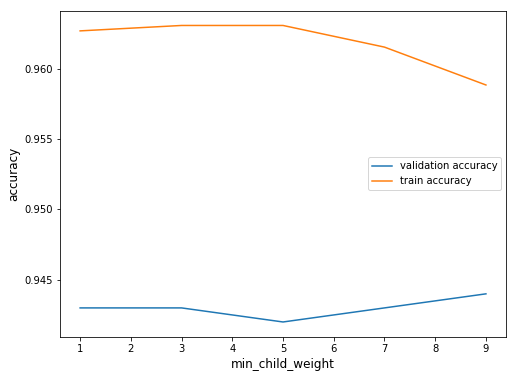

In [38]:
plt.figure(figsize=(8,6))
plt.plot(min_child_weight, result['validation accuracy'], label='validation accuracy')
plt.plot(min_child_weight, result['train accuracy'], label='train accuracy')
plt.xlabel('min_child_weight', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')
plt.show()

When tunning the `min_child_weight`, the accuracy does not improve. Therefore, we will keep `min_child_weight` as 1.

#### train the final model

In [39]:
Y_xgb = change_binary(Y)
Y_test_xgb = change_binary(Y_test)

In [40]:
d = xgb.DMatrix(X, label=Y_xgb)
dtest = xgb.DMatrix(X_test, label=Y_test_xgb)

In [41]:
param = {'max_depth':1, 'min_child_weight':1, 'learning_rate':0.05, 'objective':'multi:softmax', 'num_class':2}
bst = xgb.train(param, d, 1400)
Yhat = bst.predict(d)
Yhat_test = bst.predict(dtest)
acc_test = accuracy(Y_test_xgb, Yhat_test)
acc_train = accuracy(Y_xgb, Yhat)
print("Train Accuracy %.4f" % acc_train)
print("Test Accuracy %.4f" % acc_test)

Train Accuracy 0.9564
Test Accuracy 0.9620


For AdaBoost, the train accuracy and test accuracy is 0.9644 and 0.9570, respectively. For XGBoost, the train accuracy and test accuracy is 0.9564 and 0.9620, respectively. So the XGBoost performs better on the test set, which means less overfitting.